In [11]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [12]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# 讀取資料
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# 將資料標準化
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

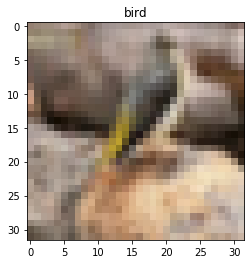

In [14]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('on');

建立神經網路
修改卷積層的filter數量為8,32,128 並將神經元數量修為128

In [15]:
CNN_layers = [Conv2D(8, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [20]:
model = Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        2336      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         36992     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

改變optimizer 與下降batch size 跟epochs

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.87),
              metrics=['categorical_accuracy'])

In [22]:
model.fit(X_train, y_train,
             batch_size=50, epochs=5,
             validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 25s 502us/sample - loss: 1.6600 - categorical_accuracy: 0.3959 - val_loss: 1.5805 - val_categorical_accuracy: 0.4137
Epoch 2/5
50000/50000 [==============================] - 25s 492us/sample - loss: 1.5833 - categorical_accuracy: 0.4305 - val_loss: 1.4285 - val_categorical_accuracy: 0.4859
Epoch 3/5
50000/50000 [==============================] - 24s 486us/sample - loss: 1.4937 - categorical_accuracy: 0.4614 - val_loss: 1.3995 - val_categorical_accuracy: 0.4971
Epoch 4/5
50000/50000 [==============================] - 25s 505us/sample - loss: 1.4100 - categorical_accuracy: 0.4931 - val_loss: 1.4671 - val_categorical_accuracy: 0.4831
Epoch 5/5
50000/50000 [==============================] - 26s 521us/sample - loss: 1.3419 - categorical_accuracy: 0.5210 - val_loss: 1.3587 - val_categorical_accuracy: 0.5219


建立b資料集

In [23]:
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

U_train = U_train / U_train.max()
U_test = U_test / U_test.max()


v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

169009152/169001437 [==============================] - 303s 2us/step


借用剛剛設定好的權重 並設立新的全連結層
並修改為 128 128

In [31]:
# New FC layers for CIFAR-100
FC_layers_CF100 = [Dense(units=128, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [32]:
new_model = Sequential(CNN_layers+FC_layers_CF100)
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        2336      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         36992     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

用借來的權重進行訓練

In [34]:
new_model.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

new_model.fit(U_train, v_train,
                batch_size=128, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 26s 519us/sample - loss: 3.7569 - categorical_accuracy: 0.1349 - val_loss: 3.3094 - val_categorical_accuracy: 0.1990
Epoch 2/5
50000/50000 [==============================] - 24s 482us/sample - loss: 3.0947 - categorical_accuracy: 0.2417 - val_loss: 3.0084 - val_categorical_accuracy: 0.2594
Epoch 3/5
50000/50000 [==============================] - 24s 489us/sample - loss: 2.8528 - categorical_accuracy: 0.2867 - val_loss: 2.8588 - val_categorical_accuracy: 0.2889
Epoch 4/5
50000/50000 [==============================] - 24s 486us/sample - loss: 2.7012 - categorical_accuracy: 0.3133 - val_loss: 2.7486 - val_categorical_accuracy: 0.3114
Epoch 5/5
50000/50000 [==============================] - 24s 487us/sample - loss: 2.5863 - categorical_accuracy: 0.3380 - val_loss: 2.7064 - val_categorical_accuracy: 0.3167


預測

In [35]:
result = model.predict_classes(U_test)

In [36]:
def predict(n): 
    print('新模型預測：', name_list[result[n]])
    X = U_test[n].reshape(32,32,3)
    plt.imshow(X)

新模型預測： bird


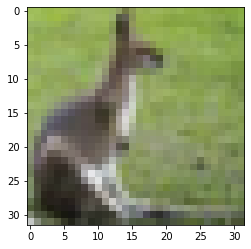

In [37]:
predict(1234)

不改變權重的話 模型的預估準確性會下降